In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [4]:
nielsen15 = pd.read_csv('../../Nielsen/aggregated_nielsen_2015.csv')
nielsen16 = pd.read_csv('../..//Nielsen/aggregated_nielsen_2016.csv')
nielsen15['year'] = 2015
nielsen16['year'] = 2016

In [5]:
nielsen = pd.concat((nielsen15, nielsen16))
nielsen = nielsen[~nielsen.is_walmart]
density_path = r"C:\Users\inesn\Documents\Mines\2A\TR\econometrics\data_collection\plein_de_data\Average_Household_Size_and_Population_Density_-_County.csv"
density = pd.read_csv(density_path)
density = density[["GEOID", "B01001_calc_PopDensity"]]
nielsen = pd.merge(nielsen, density,  how='inner', left_on='guessed_store_county_fips', right_on='GEOID')
nielsen = nielsen.rename(columns={"B01001_calc_PopDensity": "Population density (people/km^2)"})

In [6]:
## Entriy/exit dates
fandom = pd.read_csv('../data_collection/plein_de_data/fandom_traitées.csv', parse_dates=['Opening_date', 'Closing_date'])[['State', 'County_name', 'County_fips', 'Opening_date', 'Closing_date']]

# We drop the state in which we do not trust our data (some mistakes stillremain)
fandom = fandom[~np.isin(fandom.State, ('CA', 'GA', 'KS', 'LA', 'TX'))]
nielsen = nielsen[~np.isin(nielsen.store_state, ('CA', 'GA', 'KS', 'LA', 'TX'))]

# We concentrate our study on the movements (entries & exits) during the fiscal years 2015 and 2016
movements = fandom[((fandom.Opening_date >= '2015-01-31') & (fandom.Opening_date <= '2017-01-31')) | ((fandom.Closing_date >= '2015-01-31') & (fandom.Closing_date <= '2017-01-31'))]
#movements['year'] = movements.Opening_date.dt.year
#movements['month'] = movements.Opening_date.dt.month

In [7]:
nielsen.groupby('product_group_descr').mean().sort_values('upc_price_std', ascending=True).head(30)

C:\Users\inesn\AppData\Local\Temp\ipykernel_6576\742464934.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nielsen.groupby('product_group_descr').mean().sort_values('upc_price_std', ascending=True).head(30)


,is_walmart,guessed_store_county_fips,purchase_year,purchase_month,upc_price,upc_price_std,nb_of_obs,year,GEOID,Population density (people/km^2)
product_group_descr,,,,,,,,,,
YEAST,0.0,34358.913876,2015.550239,6.937799,3.457727,0.190346,1.186603,2015.550239,34358.913876,522.499322
"JUICES, DRINKS-FROZEN",0.0,31276.076638,2015.491695,6.359750,1.825015,0.440367,4.133884,2015.491695,31276.076638,338.657486
ICE,0.0,29888.888000,2015.499846,6.668000,2.318100,0.465500,2.631077,2015.499846,29888.888000,401.810312
VEGETABLES - CANNED,0.0,31244.049491,2015.498625,6.517163,1.038096,0.517872,29.851215,2015.498625,31244.049491,175.737115
PASTA,0.0,31698.057646,2015.500946,6.462988,1.449016,0.546721,15.659901,2015.500946,31698.057646,204.703387
"PUDDING, DESSERTS-DAIRY",0.0,31518.914590,2015.495125,6.446009,2.434284,0.547729,4.569520,2015.495125,31518.914590,421.110079
FRUIT - CANNED,0.0,31497.732971,2015.496603,6.641208,1.654077,0.633034,10.802289,2015.496603,31497.732971,218.655061
DOUGH PRODUCTS,0.0,31231.945841,2015.496236,6.548513,1.972625,0.634339,8.207640,2015.496236,31231.945841,218.461106
SOUP,0.0,31434.031000,2015.497921,6.540429,1.506098,0.698717,25.787703,2015.497921,31434.031000,185.135259


In [8]:
categories = [
    "FRESH PRODUCE",
    "BREAD AND BAKED GOODS",
    "MILK",
    "SNACKS",
    "PACKAGED MEATS-DELI",
    "CHEESE",
    "UNPREP MEAT/POULTRY/SEAFOOD-FRZN",
    "CARBONATED BEVERAGES",
    "CONDIMENTS, GRAVIES, AND SAUCES",
    "CANDY",
    "JUICE, DRINKS - CANNED, BOTTLED",
    "EGGS",
    "CEREAL",
    "PASTA",
    "COT CHEESE, SOUR CREAM, TOPPINGS",
    "PAPER PRODUCTS",
    "YOGURT"
]

In [9]:
state_for_cat = {"FRESH PRODUCE" : "FL",
    "BREAD AND BAKED GOODS" : "FL",
    "MILK" : "FL",
    "SNACKS" : "FL",
    "PACKAGED MEATS-DELI" : "FL",
    "CHEESE" : "FL",
    "UNPREP MEAT/POULTRY/SEAFOOD-FRZN" : "FL",
    "CARBONATED BEVERAGES" : "FL",
    "CONDIMENTS, GRAVIES, AND SAUCES" : "FL",
    "CANDY" : "FL",
    "JUICE, DRINKS - CANNED, BOTTLED" : "FL",
    "EGGS" : "FL",
    "CEREAL" : "FL",
    "PASTA" : "FL"}

## PREMIER MODELE

$$Prices_{i, t} = \alpha + \beta treat_i + \gamma treat_i* post_t$$

#### In a single state

##### FL

In [222]:
state = "FL"

In [223]:
#We choose to focus on milk prices
for category in categories:
    product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]


    # The control group is composed by all states where nothing (no entry nor exit) happened.
    control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()
    print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")


    # The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
    count = movements.groupby('County_fips').count()
    count = count[count.State == 1] # No more than one movement in the treatement group
    treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
    treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

    treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
    treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')
    print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")


    # We create our dummies for the regression
    control['treat'] = False
    control['interaction'] = False

    treatment['treat'] = True
    treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year))


    # Final dataset for the regression :

    df = pd.concat((control, treatment))[['upc_price', 'treat', 'interaction']]
    df = df[df.upc_price != 0]
    reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction', data=df)
    results0 = reg0.fit()
    if abs(results0.params[2] / results0.bse[2]) > 1. :
        print("=========================================================")
        print(category)
        print(f"Coef : {np.exp(results0.params[2])-1}")
        print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
        print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
        print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

Size of the control group: 39.
Size of the treatment group: 10.
FRESH PRODUCE
Coef : 0.02315781588328303
Coef/err : 1.0090395218243569
CI_up : -0.02139081533954168
CI_down : 0.06973440737353154
Size of the control group: 38.
Size of the treatment group: 10.
Size of the control group: 38.
Size of the treatment group: 10.
MILK
Coef : -0.04445908351422889
Coef/err : 2.9902664088169657
CI_up : -0.07255181175455638
CI_down : -0.015515416763279055
Size of the control group: 39.
Size of the treatment group: 10.
SNACKS
Coef : 0.04295343051544087
Coef/err : 1.326409319813448
CI_up : -0.019955000048633487
CI_down : 0.10989991100194851
Size of the control group: 38.
Size of the treatment group: 10.
PACKAGED MEATS-DELI
Coef : -0.052973541345279096
Coef/err : 1.699698253399302
CI_up : -0.11064640538963122
CI_down : 0.008439296616348901
Size of the control group: 38.
Size of the treatment group: 10.
CHEESE
Coef : -0.04088977389991366
Coef/err : 1.8904102824256235
CI_up : -0.08156314849902924
CI_down

##### SC

In [224]:
state = "SC"

In [225]:
# We choose to focus on milk prices
for category in categories:
    product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]


    # The control group is composed by all states where nothing (no entry nor exit) happened.
    control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()
    print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")


    # The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
    count = movements.groupby('County_fips').count()
    count = count[count.State == 1] # No more than one movement in the treatement group
    treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
    treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

    treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
    treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')
    print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")


    # We create our dummies for the regression
    control['treat'] = False
    control['interaction'] = False

    treatment['treat'] = True
    treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year))


    # Final dataset for the regression :

    df = pd.concat((control, treatment))[['upc_price', 'treat', 'interaction']]
    df = df[df.upc_price != 0]
    reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction', data=df)
    results0 = reg0.fit()
    if abs(results0.params[2] / results0.bse[2]) > 1. :
        print("=========================================================")
        print(category)
        print(f"Coef : {np.exp(results0.params[2])-1}")
        print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
        print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
        print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

Size of the control group: 27.
Size of the treatment group: 9.
Size of the control group: 28.
Size of the treatment group: 9.
Size of the control group: 28.
Size of the treatment group: 9.
MILK
Coef : -0.11234085719451792
Coef/err : 5.539880558425527
CI_up : -0.14904728401491685
CI_down : -0.0740510735734281
Size of the control group: 27.
Size of the treatment group: 9.
Size of the control group: 27.
Size of the treatment group: 9.
Size of the control group: 28.
Size of the treatment group: 9.
CHEESE
Coef : -0.10009062183549111
Coef/err : 3.6871429462034726
CI_up : -0.14923306464147623
CI_down : -0.04810958765439366
Size of the control group: 27.
Size of the treatment group: 9.
UNPREP MEAT/POULTRY/SEAFOOD-FRZN
Coef : -0.09037190083710256
Coef/err : 2.528124822726927
CI_up : -0.1548788764709531
CI_down : -0.020941193220255006
Size of the control group: 28.
Size of the treatment group: 9.
Size of the control group: 28.
Size of the treatment group: 9.
Size of the control group: 28.
Size o

##### VA

In [16]:
state = "VA"

In [18]:
# We choose to focus on milk prices
for category in categories:
    product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]


    # The control group is composed by all states where nothing (no entry nor exit) happened.
    control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()
    print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")


    # The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
    count = movements.groupby('County_fips').count()
    count = count[count.State == 1] # No more than one movement in the treatement group
    treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
    treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

    treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
    treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')
    print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")


    # We create our dummies for the regression
    control['treat'] = False
    control['interaction'] = False

    treatment['treat'] = True
    treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year))


    # Final dataset for the regression :

    df = pd.concat((control, treatment))[['upc_price', 'treat', 'interaction']]
    df = df[df.upc_price != 0]
    reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction', data=df)
    results0 = reg0.fit()
    if abs(results0.params[2] / results0.bse[2]) > 0. :
        print("=========================================================")
        print(category)
        print(f"Coef : {np.exp(results0.params[2])-1}")
        print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
        print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
        print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

Size of the control group: 95.
Size of the treatment group: 10.
FRESH PRODUCE
Coef : 0.059596233510349705
Coef/err : 1.613701628491074
CI_up : -0.012383744373377414
CI_down : 0.13682229476565366
Size of the control group: 95.
Size of the treatment group: 10.
BREAD AND BAKED GOODS
Coef : 0.09617642994779785
Coef/err : 2.617317377926245
CI_up : 0.023290930248326847
CI_down : 0.1742533135532638
Size of the control group: 93.
Size of the treatment group: 10.
MILK
Coef : -0.03752363956982008
Coef/err : 1.4607825475910312
CI_up : -0.08569510422643423
CI_down : 0.013185807785880632
Size of the control group: 95.
Size of the treatment group: 10.
SNACKS
Coef : 0.09070167476977331
Coef/err : 2.374409321778223
CI_up : 0.015226806371168244
CI_down : 0.1717875610454065
Size of the control group: 94.
Size of the treatment group: 10.
PACKAGED MEATS-DELI
Coef : -0.02233878291458058
Coef/err : 0.5396540155831038
CI_up : -0.09939834388702484
CI_down : 0.061314343478223954
Size of the control group: 93.


##### NC

In [228]:
state = "NC"

In [229]:
# We choose to focus on milk prices
for category in categories:
    product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]


    # The control group is composed by all states where nothing (no entry nor exit) happened.
    control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()
    print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")


    # The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
    count = movements.groupby('County_fips').count()
    count = count[count.State == 1] # No more than one movement in the treatement group
    treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
    treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

    treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
    treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')
    print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")


    # We create our dummies for the regression
    control['treat'] = False
    control['interaction'] = False

    treatment['treat'] = True
    treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year))


    # Final dataset for the regression :

    df = pd.concat((control, treatment))[['upc_price', 'treat', 'interaction']]
    df = df[df.upc_price != 0]
    reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction', data=df)
    results0 = reg0.fit()
    if abs(results0.params[2] / results0.bse[2]) > 1. :
        print("=========================================================")
        print(category)
        print(f"Coef : {np.exp(results0.params[2])-1}")
        print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
        print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
        print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

Size of the control group: 65.
Size of the treatment group: 7.
Size of the control group: 65.
Size of the treatment group: 7.
Size of the control group: 64.
Size of the treatment group: 7.
Size of the control group: 65.
Size of the treatment group: 7.
SNACKS
Coef : 0.10280218679695086
Coef/err : 2.285277408845297
CI_up : 0.013960373157137385
CI_down : 0.1994281979850725
Size of the control group: 65.
Size of the treatment group: 7.
Size of the control group: 65.
Size of the treatment group: 7.
Size of the control group: 64.
Size of the treatment group: 7.
Size of the control group: 65.
Size of the treatment group: 7.
Size of the control group: 65.
Size of the treatment group: 7.
CONDIMENTS, GRAVIES, AND SAUCES
Coef : 0.06076014224882087
Coef/err : 1.2980161463365374
CI_up : -0.029706756329480166
CI_down : 0.15966187204105098
Size of the control group: 65.
Size of the treatment group: 7.
CANDY
Coef : 0.14284600334524988
Coef/err : 2.0287859582061354
CI_up : 0.004429002348988131
CI_down 

#### In all states

In [195]:
# We choose to focus on milk prices
for category in categories:
    product_group = nielsen[(nielsen.product_group_descr == category)]


    # The control group is composed by all states where nothing (no entry nor exit) happened.
    control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()
    print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")


    # The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
    count = movements.groupby('County_fips').count()
    count = count[count.State == 1] # No more than one movement in the treatement group
    treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
    treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

    treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
    treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')
    print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")


    # We create our dummies for the regression
    control['treat'] = False
    control['interaction'] = False

    treatment['treat'] = True
    treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year))

    # Final dataset for the regression :

    df = pd.concat((control, treatment))[['upc_price', 'treat', 'interaction']]
    df = df[df.upc_price != 0]
    reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction', data=df)
    results0 = reg0.fit()
    if abs(results0.params[2] / results0.bse[2]) > 1. :
        print("=========================================================")
        print(category)
        print(f"Coef : {np.exp(results0.params[2])-1}")
        print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
        print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
        print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

Size of the control group: 1831.
Size of the treatment group: 91.
Size of the control group: 1836.
Size of the treatment group: 91.
Size of the control group: 1822.
Size of the treatment group: 91.
MILK
Coef : -0.05959158373209339
Coef/err : 6.201796830566224
CI_up : -0.077676211161124
CI_down : -0.04115235876019929
Size of the control group: 1837.
Size of the treatment group: 91.
SNACKS
Coef : 0.01971258231192108
Coef/err : 1.5904346195770565
CI_up : -0.00452605598484046
CI_down : 0.04454140339549828
Size of the control group: 1816.
Size of the treatment group: 91.
Size of the control group: 1816.
Size of the treatment group: 91.
CHEESE
Coef : -0.01883707470513718
Coef/err : 1.537049729843573
CI_up : -0.042344038275416884
CI_down : 0.005246899146892581
Size of the control group: 1794.
Size of the treatment group: 90.
UNPREP MEAT/POULTRY/SEAFOOD-FRZN
Coef : -0.03345220251013248
Coef/err : 2.379012373360577
CI_up : -0.06017045899311435
CI_down : -0.0059743771922259326
Size of the contro

## Build a better control group

##### SC analysis

In [19]:
state = "NC"
#category = "FRESH PRODUCE"

In [20]:
for category in categories:
    product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]
    # The control group is composed by all states where nothing (no entry nor exit) happened.
    control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()

    # The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
    count = movements.groupby('County_fips').count()
    count = count[count.State == 1] # No more than one movement in the treatement group
    treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
    treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

    treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
    treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')

    # We create our dummies for the regression
    control['treat'] = False
    control['interaction'] = False
    control['time_effects'] = list(zip(control.purchase_year, control.purchase_month))

    treatment['treat'] = True
    treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                                   (treatment.purchase_year > treatment.Opening_date.dt.year))
    treatment['time_effects'] = list(zip(treatment.purchase_year, treatment.purchase_month))


    # Final dataset for the regression :

    df0 = pd.concat((control, treatment))
    df = df0[['upc_price', 'treat', 'interaction','time_effects']]
    df = df[df.upc_price != 0]
    reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction + C(time_effects)', data=df)
    results0 = reg0.fit()

    if abs(results0.params[2] / results0.bse[2]) > 0. :
        print("=========================================================")
        print(category)
        print(f"Coef : {np.exp(results0.params[2])-1}")
        print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
        print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
        print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

FRESH PRODUCE
Coef : -0.012906080364368466
Coef/err : 0.3004905640651296
CI_up : -0.0931569965844633
CI_down : 0.07444662693743331
BREAD AND BAKED GOODS
Coef : 0.04523637906030431
Coef/err : 0.9991391923652215
CI_up : -0.04171998713485081
CI_down : 0.14008335084083345
MILK
Coef : 0.03229380826447503
Coef/err : 1.009308389319965
CI_up : -0.029542074315676015
CI_down : 0.09806976518815813
SNACKS
Coef : 0.09834994487522719
Coef/err : 2.1153948954264417
CI_up : 0.006846739080954789
CI_down : 0.19816905054346812
PACKAGED MEATS-DELI
Coef : 0.06125514630170481
Coef/err : 1.2919638298669318
CI_up : -0.03034310606560897
CI_down : 0.1615061911043949
CHEESE
Coef : 0.02867108832041354
Coef/err : 0.7429710692917179
CI_up : -0.04530723143285298
CI_down : 0.108381924306866
UNPREP MEAT/POULTRY/SEAFOOD-FRZN
Coef : 0.008704259850061069
Coef/err : 0.18630710599249117
CI_up : -0.07926861136330077
CI_down : 0.10508265102835224
CARBONATED BEVERAGES
Coef : -0.008024614249544149
Coef/err : 0.14300464844014502

In [126]:
product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]
# The control group is composed by all states where nothing (no entry nor exit) happened.
control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()

Size of the control group: 65.


In [149]:
#control group analysis
print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")

Size of the control group: 65.


7.94127332458665 484.029322859142


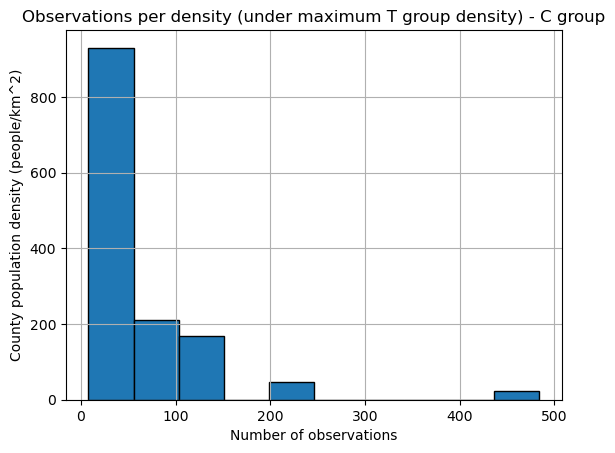

In [156]:
print(control["Population density (people/km^2)"].min(),control["Population density (people/km^2)"].max())
plt.hist(control["Population density (people/km^2)"], edgecolor='black')
plt.xlabel('Number of observations')
plt.ylabel('County population density (people/km^2)')
plt.title('Observations per density (under maximum T group density) - C group')
#plt.ylim(0, 3000)
plt.grid(True)
plt.show()
#savefig("../../results_summary/density_control_hist_0.png")

In [157]:
# The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
count = movements.groupby('County_fips').count()
count = count[count.State == 1] # No more than one movement in the treatement group
treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')

In [159]:
# treatment group analysis
print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")

Size of the treatment group: 7.


26.1538678361341 450.441761812079


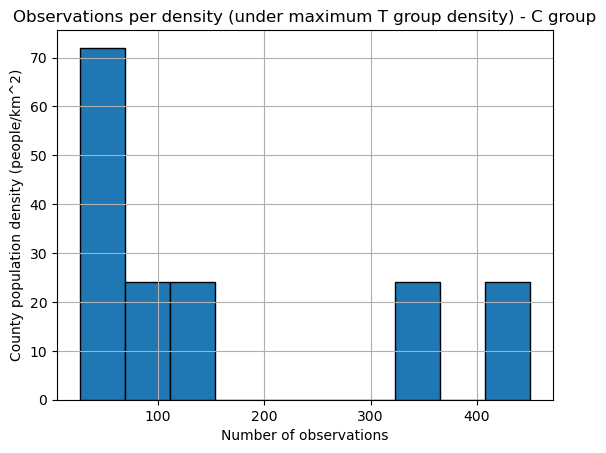

In [158]:
print(treatment["Population density (people/km^2)"].min(),treatment["Population density (people/km^2)"].max())
plt.hist(treatment["Population density (people/km^2)"], edgecolor='black')
plt.xlabel('Number of observations')
plt.ylabel('County population density (people/km^2)')
plt.title('Observations per density (under maximum T group density) - C group')
#plt.ylim(0, 3000)
plt.grid(True)
plt.show()
#savefig("../../results_summary/density_control_hist_0.png")

In [196]:
# We create our dummies for the regression
control['treat'] = False
control['interaction'] = False
control['time_effects'] = list(zip(control.purchase_year, control.purchase_month))

treatment['treat'] = True
treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year))
treatment['time_effects'] = list(zip(treatment.purchase_year, treatment.purchase_month))


# Final dataset for the regression :

df0 = pd.concat((control, treatment))
df = df0[['upc_price', 'treat', 'interaction','time_effects']]
df = df[df.upc_price != 0]
reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction + C(time_effects)', data=df)
results0 = reg0.fit()
y_hat = results0.fittedvalues
u_hat = results0.resid

In [87]:
results0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(upc_price)   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.127
Date:                Fri, 04 Nov 2022   Prob (F-statistic):              0.302
Time:                        14:19:39   Log-Likelihood:                -116.45
No. Observations:                1549   AIC:                             284.9
Df Residuals:                    1523   BIC:                             423.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.7066      0.033     21.405      0.000       0.642       0.771
treat[T.True]                     0.0559      0.026      2.144      0.032       0.005       0.107
interaction[T.True]              -0.0958      0.044     -2.160      0.031      -0.183      -0.009
C(time_effects)[T.(2015, 2)]     -0.0001      0.046     -0.003      0.998      -0.091       0.090
C(time_effects)[T.(2015, 3)]     -0.0044      0.046     -0.097      0.923      -0.094       0.085
C(time_effects)[T.(2015, 4)]      0.0107      0.047      0.227      0.820      -0.082       0.103
C(time_effects)[T.(2015, 5)]  -9.885e-05      0.046     -0.002      0.998      -0.091       0.090
C(time_effects)[T.(2015, 6)]      0.0768      0.046      1.670      0.095      -0.013       0.167
C(time_effects)[T.(2015, 7)]      0.1108      0.046      2.408      0.016       0.021       0.201
C(time_effects)[T.(2015, 8)]      0.0319      0.047      0.677      0.499      -0.061       0.124
C(time_effects)[T.(2015, 9)]     -0.0040      0.046     -0.087      0.930      -0.095       0.087
C(time_effects)[T.(2015, 10)]     0.0392      0.047      0.842      0.400      -0.052       0.131
C(time_effects)[T.(2015, 11)]    -0.0162      0.047     -0.347      0.729      -0.108       0.075
C(time_effects)[T.(2015, 12)]     0.0392      0.047      0.844      0.399      -0.052       0.130
C(time_effects)[T.(2016, 1)]      0.0093      0.046      0.201      0.841      -0.082       0.100
C(time_effects)[T.(2016, 2)]      0.0249      0.047      0.534      0.593      -0.067       0.117
C(time_effects)[T.(2016, 3)]      0.0243      0.046      0.524      0.601      -0.067       0.115
C(time_effects)[T.(2016, 4)]      0.0120      0.046      0.259      0.796      -0.079       0.103
C(time_effects)[T.(2016, 5)]     -0.0083      0.046     -0.179      0.858      -0.099       0.083
C(time_effects)[T.(2016, 6)]      0.0655      0.046      1.420      0.156      -0.025       0.156
C(time_effects)[T.(2016, 7)]      0.0774      0.046      1.676      0.094      -0.013       0.168
C(time_effects)[T.(2016, 8)]      0.0083      0.047      0.178      0.859      -0.083       0.100
C(time_effects)[T.(2016, 9)]      0.0116      0.047      0.248      0.804      -0.081       0.104
C(time_effects)[T.(2016, 10)]     0.0347      0.047      0.741      0.459      -0.057       0.127
C(time_effects)[T.(2016, 11)]     0.0043      0.047      0.092      0.927      -0.088       0.097
C(time_effects)[T.(2016, 12)]     0.0065      0.047      0.139      0.890      -0.085       0.098
==============================================================================
Omnibus:                      270.014   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2522.358
Skew

Text(0.5, 0, 'observation')

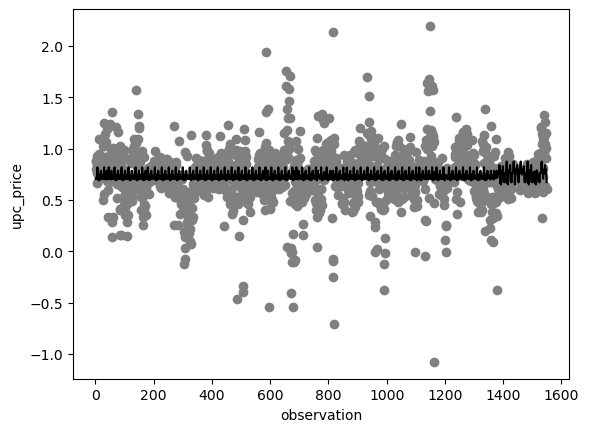

In [161]:
#pd.set_option("display.max_rows", None)
#y_hat.shape[0]
plt.plot(np.arange(1, 1550), np.log(df['upc_price']), color='grey', marker='o', linestyle='')
plt.plot(np.arange(1, 1550), results0.fittedvalues, color='black', linestyle='-')
plt.ylabel('upc_price')
plt.xlabel('observation')
#if abs(results0.params[2] / results0.bse[2]) > 0. :
#    print("=========================================================")
#    print(category)
#    print(f"Coef : {np.exp(results0.params[2])-1}")
#    print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
#    print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
#    print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

In [138]:
y_hat = y_hat.rename("fitted_value").to_frame()
new = pd.merge(df0, y_hat, left_index=True, right_index=True)
new['upc_price']=np.log(new['upc_price'])

Text(0.5, 0, 'observation')

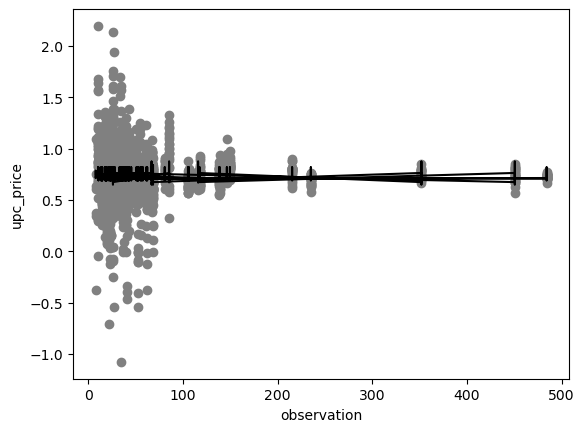

In [148]:
plt.plot('Population density (people/km^2)','upc_price', data = new, color='grey', marker='o', linestyle='')
plt.plot('Population density (people/km^2)','fitted_value', data = new, color='black', linestyle='-')
plt.ylabel('upc_price')
plt.xlabel('observation')
#plt.xlim(445,455)

In [169]:
new['residual']=np.abs(new['upc_price']-new['fitted_value'])
new = new.sort_values(by='residual', ascending=False)

In [179]:
#new.tail(50)
new.groupby(['guessed_store_county','guessed_store_county_fips']).mean("purchase_year").tail(50)
#new[new["guessed_store_county"]=="NEW HANOVER"]

,,is_walmart,purchase_year,purchase_month,upc_price,upc_price_std,nb_of_obs,year,GEOID,Population density (people/km^2),treat,interaction,County_fips,fitted_value,residual
guessed_store_county,guessed_store_county_fips,,,,,,,,,,,,,,
DAVIE,37059,0.0,2015.500000,6.500000,0.781200,1.469987,23.375000,2015.500000,37059.0,61.483133,0.0,0.000000,NaN,0.729653,0.161160
DUPLIN,37061,0.0,2015.500000,6.500000,0.672343,1.514431,30.458333,2015.500000,37061.0,27.989342,0.0,0.000000,NaN,0.729653,0.157031
EDGECOMBE,37065,0.0,2015.521739,6.565217,0.526190,1.044577,11.217391,2015.521739,37065.0,40.740505,0.0,0.000000,NaN,0.730662,0.273162
FORSYTH,37067,0.0,2015.500000,6.500000,0.746165,1.388721,383.208333,2015.500000,37067.0,351.818409,1.0,0.166667,37067.0,0.769597,0.056000
FRANKLIN,37069,0.0,2015.500000,6.500000,0.703882,1.166639,28.750000,2015.500000,37069.0,50.953202,0.0,0.000000,NaN,0.729653,0.166262
GASTON,37071,0.0,2015.500000,6.500000,0.693779,1.186103,192.666667,2015.500000,37071.0,235.083410,0.0,0.000000,NaN,0.729653,0.056148
GRANVILLE,37077,0.0,2015.500000,6.500000,0.763862,1.374335,34.541667,2015.500000,37077.0,42.728884,0.0,0.000000,NaN,0.729653,0.130815
HALIFAX,37083,0.0,2015.529412,6.823529,0.867938,0.994053,2.588235,2015.529412,37083.0,27.600904,0.0,0.000000,NaN,0.725548,0.382447
HAYWOOD,37087,0.0,2015.500000,6.500000,0.661440,1.220587,50.416667,2015.500000,37087.0,42.151369,0.0,0.000000,NaN,0.729653,0.124114


##### NC

In [88]:
state = "SC"
category = 'CHEESE'

Size of the control group: 28.
Size of the treatment group: 9.


Text(0.5, 0, 'observation')

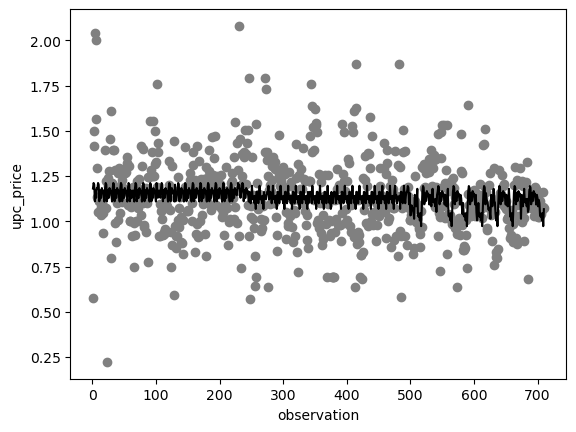

In [90]:
product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]


# The control group is composed by all states where nothing (no entry nor exit) happened.
control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()
print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")


# The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
count = movements.groupby('County_fips').count()
count = count[count.State == 1] # No more than one movement in the treatement group
treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')
print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")


# We create our dummies for the regression
control['treat'] = False
control['interaction'] = False
control['time_effects'] = list(zip(control.purchase_year, control.purchase_month))

treatment['treat'] = True
treatment['interaction'] = ((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year)
treatment['time_effects'] = list(zip(treatment.purchase_year, treatment.purchase_month))


# Final dataset for the regression :

df = pd.concat((control, treatment))[['upc_price', 'treat', 'interaction','time_effects']]
df = df[df.upc_price != 0]
reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction + C(time_effects)', data=df)
results0 = reg0.fit()
y_hat = results0.fittedvalues
u_hat = results0.resid
#pd.set_option("display.max_rows", None)
#y_hat.shape[0]
plt.plot(np.arange(1, 711), np.log(df['upc_price']), color='grey', marker='o', linestyle='')
plt.plot(np.arange(1, 711), results0.fittedvalues, color='black', linestyle='-')
plt.ylabel('upc_price')
plt.xlabel('observation')
#if abs(results0.params[2] / results0.bse[2]) > 0. :
#    print("=========================================================")
#    print(category)
#    print(f"Coef : {np.exp(results0.params[2])-1}")
#    print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
#    print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
#    print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

In [91]:
results0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(upc_price)   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.449
Date:                Fri, 04 Nov 2022   Prob (F-statistic):             0.0735
Time:                        14:23:56   Log-Likelihood:                 120.00
No. Observations:                 710   AIC:                            -188.0
Df Residuals:                     684   BIC:                            -69.30
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.1810      0.039     30.170      0.000       1.104       1.258
treat[T.True]                    -0.0168      0.020     -0.847      0.397      -0.056       0.022
interaction[T.True]              -0.0785      0.033     -2.395      0.017      -0.143      -0.014
C(time_effects)[T.(2015, 2)]      0.0307      0.054      0.570      0.569      -0.075       0.136
C(time_effects)[T.(2015, 3)]      0.0213      0.054      0.397      0.692      -0.084       0.127
C(time_effects)[T.(2015, 4)]     -0.0703      0.054     -1.296      0.195      -0.177       0.036
C(time_effects)[T.(2015, 5)]     -0.0086      0.054     -0.161      0.872      -0.114       0.097
C(time_effects)[T.(2015, 6)]     -0.0532      0.056     -0.955      0.340      -0.163       0.056
C(time_effects)[T.(2015, 7)]     -0.0509      0.054     -0.939      0.348      -0.157       0.056
C(time_effects)[T.(2015, 8)]      0.0025      0.055      0.046      0.963      -0.105       0.110
C(time_effects)[T.(2015, 9)]     -0.0220      0.054     -0.405      0.686      -0.129       0.085
C(time_effects)[T.(2015, 10)]    -0.0105      0.055     -0.191      0.848      -0.118       0.097
C(time_effects)[T.(2015, 11)]    -0.0371      0.054     -0.683      0.495      -0.144       0.069
C(time_effects)[T.(2015, 12)]    -0.0718      0.056     -1.288      0.198      -0.181       0.038
C(time_effects)[T.(2016, 1)]     -0.0181      0.055     -0.331      0.741      -0.125       0.089
C(time_effects)[T.(2016, 2)]     -0.0366      0.054     -0.675      0.500      -0.143       0.070
C(time_effects)[T.(2016, 3)]     -0.0813      0.055     -1.488      0.137      -0.189       0.026
C(time_effects)[T.(2016, 4)]     -0.0459      0.055     -0.832      0.406      -0.154       0.062
C(time_effects)[T.(2016, 5)]      0.0153      0.054      0.281      0.779      -0.091       0.122
C(time_effects)[T.(2016, 6)]     -0.0536      0.055     -0.984      0.325      -0.161       0.053
C(time_effects)[T.(2016, 7)]     -0.0600      0.056     -1.079      0.281      -0.169       0.049
C(time_effects)[T.(2016, 8)]     -0.0435      0.055     -0.788      0.431      -0.152       0.065
C(time_effects)[T.(2016, 9)]     -0.0812      0.055     -1.484      0.138      -0.189       0.026
C(time_effects)[T.(2016, 10)]    -0.0402      0.054     -0.747      0.456      -0.146       0.066
C(time_effects)[T.(2016, 11)]    -0.1125      0.056     -2.019      0.044      -0.222      -0.003
C(time_effects)[T.(2016, 12)]    -0.0186      0.054     -0.347      0.728      -0.124       0.087
==============================================================================
Omnibus:                       63.471   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.400
Skew